In [6]:
%pip install pandas numpy matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sqlite3
from sqlite3 import Error

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 27.0 MB/s  0:00:00m0:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 36.1 MB/s  0:00:00m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 35.9 MB/s  0:00:00m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 38.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 39.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 37.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12/12 [seaborn]1/12 [seaborn]ib]
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

df1_clean = pd.read_csv("../datasets/cleaned_dataset1.csv")  # Financial Institution Accounts
df2_clean = pd.read_csv("../datasets/cleaned_dataset2.csv")  # Mobile Accounts

print(" Datasets loaded successfully for DB Integration.\n")
print("Dataset 1 columns:", df1_clean.columns.tolist())
print("Dataset 2 columns:", df2_clean.columns.tolist())

 Datasets loaded successfully for DB Integration.

Dataset 1 columns: ['REF_AREA', 'REF_AREA_LABEL', 'INDICATOR_LABEL', 'SEX', 'AGE', 'TIME_PERIOD', 'OBS_VALUE']
Dataset 2 columns: ['REF_AREA', 'REF_AREA_LABEL', 'INDICATOR_LABEL', 'SEX', 'AGE', 'TIME_PERIOD', 'OBS_VALUE']


In [8]:
conn = sqlite3.connect("assignment_db.sqlite")
cursor = conn.cursor()


cursor.execute("DROP TABLE IF EXISTS dataset1")
cursor.execute("DROP TABLE IF EXISTS dataset2")


df1_clean.to_sql("dataset1", conn, if_exists="replace", index=False)
df2_clean.to_sql("dataset2", conn, if_exists="replace", index=False)

print(" Data inserted into SQLite database successfully!")

 Data inserted into SQLite database successfully!


In [9]:
print("\n=== Query Results (first 5 rows Dataset 1: Financial Accounts) ===")
for row in cursor.execute("SELECT * FROM dataset1 LIMIT 5"):
    print(row)

print("\n=== Query Results (first 5 rows Dataset 2: Mobile Accounts) ===")
for row in cursor.execute("SELECT * FROM dataset2 LIMIT 5"):
    print(row)


if "LOCATION" in df2_clean.columns:
    query = "SELECT LOCATION, AVG(OBS_VALUE) as avg_mobile FROM dataset2 GROUP BY LOCATION LIMIT 5"
    print("\n=== Average Mobile Account Ownership by Location ===")
    for row in cursor.execute(query):
        print(row)



=== Query Results (first 5 rows Dataset 1: Financial Accounts) ===
('ZAF', 'South Africa', 'Used a mobile phone or the internet to pay bills', '_T', 'Y_GE15', 2017, 10.1248959063959)
('ZAF', 'South Africa', 'Used a mobile phone or the internet to pay bills', '_T', 'Y_GE15', 2021, 27.61365577761289)
('ZAF', 'South Africa', 'Used a mobile phone or the internet to pay bills', '_T', 'Y_GE15', 2024, 20.8100487221205)
('ZAF', 'South Africa', 'Used a mobile phone or the internet to pay bills', 'M', 'Y_GE15', 2017, 11.1420220580158)
('ZAF', 'South Africa', 'Used a mobile phone or the internet to pay bills', 'F', 'Y_GE15', 2017, 9.1718384752283)

=== Query Results (first 5 rows Dataset 2: Mobile Accounts) ===
('ZAF', 'South Africa', 'Mobile money account', '_T', 'Y_GE15', 2014, 14.4281801716055)
('ZAF', 'South Africa', 'Mobile money account', '_T', 'Y_GE15', 2017, 19.0168459424566)
('ZAF', 'South Africa', 'Mobile money account', '_T', 'Y_GE15', 2021, 36.5653075160157)
('ZAF', 'South Africa', '

In [10]:
if "TIME" in df1_clean.columns:
    cursor.execute("""
    UPDATE dataset1
    SET obs_value = obs_value + 5
    WHERE time = 2020
    """)
    print("\n Records updated: Added +5 to 2020 values in dataset1")

cursor.execute("DELETE FROM dataset2 WHERE obs_value IS NULL")
print(" Records with NULL obs_value deleted in dataset2")


conn.commit()

 Records with NULL obs_value deleted in dataset2


In [11]:
df1_db = pd.read_sql("SELECT * FROM dataset1", conn)
df2_db = pd.read_sql("SELECT * FROM dataset2", conn)

print("\n Data loaded back into Pandas!")
print("Dataset 1 shape (from DB):", df1_db.shape)
print("Dataset 2 shape (from DB):", df2_db.shape)


 Data loaded back into Pandas!
Dataset 1 shape (from DB): (35, 7)
Dataset 2 shape (from DB): (46, 7)


In [12]:
df1_db["OBS_VALUE"] = pd.to_numeric(df1_db["OBS_VALUE"], errors="coerce")
df2_db["OBS_VALUE"] = pd.to_numeric(df2_db["OBS_VALUE"], errors="coerce")


df1_db = df1_db.dropna(subset=["OBS_VALUE"]) 
df2_db["OBS_VALUE"] = df2_db["OBS_VALUE"].fillna(df2_db["OBS_VALUE"].mean())  


df1_db["OBS_VALUE_NORM"] = (df1_db["OBS_VALUE"] - df1_db["OBS_VALUE"].min()) / (df1_db["OBS_VALUE"].max() - df1_db["OBS_VALUE"].min())
df2_db["OBS_VALUE_NORM"] = (df2_db["OBS_VALUE"] - df2_db["OBS_VALUE"].min()) / (df2_db["OBS_VALUE"].max() - df2_db["OBS_VALUE"].min())

print("\n Data cleaned and transformed successfully!")


 Data cleaned and transformed successfully!


In [13]:
print("\n=== Summary Statistics (Financial Institution Accounts) ===")
print(df1_db["OBS_VALUE"].describe())

print("\n=== Summary Statistics (Mobile Accounts) ===")
print(df2_db["OBS_VALUE"].describe())


=== Summary Statistics (Financial Institution Accounts) ===
count    35.000000
mean     18.490516
std       9.076089
min       2.795583
25%      11.915125
50%      17.058087
75%      25.184274
max      38.401252
Name: OBS_VALUE, dtype: float64

=== Summary Statistics (Mobile Accounts) ===
count    46.000000
mean     24.718663
std      10.880715
min       6.021378
25%      17.040629
50%      22.898089
75%      33.958025
max      48.839866
Name: OBS_VALUE, dtype: float64


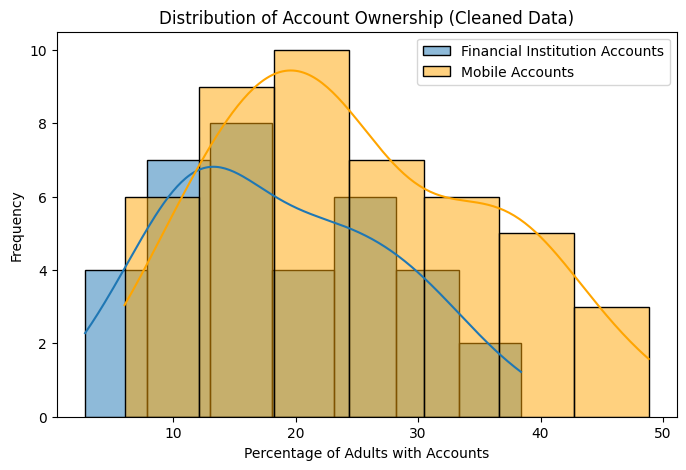


 Database connection closed. Work complete!


In [14]:
plt.figure(figsize=(8,5))
sns.histplot(df1_db["OBS_VALUE"], kde=True, label="Financial Institution Accounts")
sns.histplot(df2_db["OBS_VALUE"], kde=True, color="orange", label="Mobile Accounts")
plt.legend()
plt.title("Distribution of Account Ownership (Cleaned Data)")
plt.xlabel("Percentage of Adults with Accounts")
plt.ylabel("Frequency")
plt.show()


conn.close()
print("\n Database connection closed. Work complete!")